In [1]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 1.13.0 cuda: True
mmdetection: 3.2.0
mmcv: 2.1.0
mmengine: 0.9.1


In [4]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
config_file = './checkpoints/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py'
# Setup a checkpoint file to load
checkpoint_file = './checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

register_all_modules()

model = init_detector(config_file, checkpoint_file, device='cuda:0')

Loads checkpoint by local backend from path: ./checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


In [5]:
image = mmcv.imread('./mmdetection/demo/demo.jpg', channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    img_shape: (800, 1199)
    img_id: 0
    ori_shape: (427, 640)
    batch_input_shape: (800, 1216)
    pad_shape: (800, 1216)
    scale_factor: (1.8734375, 1.873536299765808)
    img_path: None

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([13,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 13, 56,  2,  2,
                         2,  0,  0,  2,  2,  2,  0,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,
                         0,  7,  7,  7,  2,  7,  7, 25,  2,  0,  2,  7,  7,  2,  2,  7],
                       device='cuda:0')
            bboxes: tensor([[219.8677, 177.0776, 458.3699, 382.1378],
                        [480.5591, 110.4768, 523.1897, 130.3326],
                        [167.2959, 108.4706, 219.3714, 139.7076],
                        [432.7687, 104.8359, 482.8199, 132.2971],
                        [293.9354, 116.1539, 381.

In [23]:
from mmdet.registry import VISUALIZERS
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta



c:\Users\asiclab\anaconda3\envs\openmmlab\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


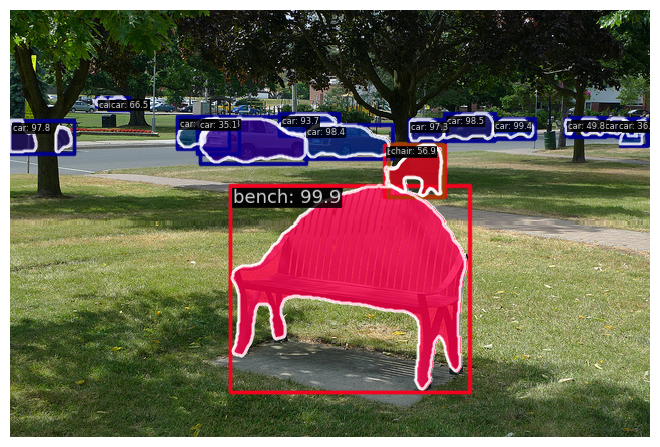

In [24]:
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time = 0,
)

visualizer.show()

In [25]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('data/'):
        print(dirname)
import os
import sys
sys.path.append("mmdetection")
import time
import matplotlib

import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

data/
data/test
data/test\images
data/train
data/train\images
data/validation
data/validation\images


In [1]:
# Check the label of a single image
import mmengine
from collections import OrderedDict
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pylab as plt
from tqdm.notebook import tqdm
import cv2

annotation = mmengine.load('./data/train/annotations.json')

In [2]:
annotation.keys()

dict_keys(['categories', 'info', 'images', 'annotations'])

In [3]:
annotation['info']

'{}'

In [4]:
# For reading annotations file
from pycocotools.coco import COCO
import json
import mmengine
from collections import OrderedDict
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pylab as plt
from tqdm.notebook import tqdm
import cv2

# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "data/train/annotations.json"
TRAIN_IMAGE_DIRECTIORY = "data/train/images/"

VAL_ANNOTATIONS_PATH = "data/validation/annotations.json"
VAL_IMAGE_DIRECTIORY = "data/validation/images/"

train_coco = COCO(TRAIN_ANNOTATIONS_PATH)



loading annotations into memory...
Done (t=3.13s)
creating index...
index created!


In [5]:
# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
  train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
  val_annotations_data = json.load(f)
  
train_annotations_data['annotations'][0]

FileNotFoundError: [Errno 2] No such file or directory: 'data/validation/annotations.json'

In [ ]:
category_ids = train_coco.loadCats(train_coco.getCatIds())
category_names = [cat["name_readable"] for cat in category_ids]

print("## Categories\n-", "\n- ".join(category_names))

## Categories
- Beetroot, steamed, without addition of salt
- bread_wholemeal
- jam
- water
- bread
- banana
- soft_cheese
- ham_raw
- hard_cheese
- cottage_cheese
- coffee
- fruit_mixed
- pancake
- tea
- salmon_smoked
- avocado
- spring_onion_scallion
- ristretto_with_caffeine
- ham_n_s
- egg
- bacon
- chips_french_fries
- juice_apple
- chicken
- tomato
- broccoli
- shrimp_prawn
- carrot
- chickpeas
- french_salad_dressing
- pasta_hornli_ch
- sauce_cream
- pasta_n_s
- tomato_sauce
- cheese_n_s
- pear
- cashew_nut
- almonds
- lentil_n_s
- mixed_vegetables
- peanut_butter
- apple
- blueberries
- cucumber
- yogurt
- butter
- mayonnaise
- soup
- wine_red
- wine_white
- green_bean_steamed_without_addition_of_salt
- sausage
- pizza_margherita_baked
- salami_ch
- mushroom
- tart_n_s
- rice
- white_coffee
- sunflower_seeds
- bell_pepper_red_raw
- zucchini
- asparagus
- tartar_sauce
- lye_pretzel_soft
- cucumber_pickled_ch
- curry_vegetarian
- soup_of_lentils_dahl_dhal
- salmon
- salt_cake_ch_

In [ ]:
no_images_per_category = {}

for n, i in enumerate(train_coco.getCatIds()):
    imgIds = train_coco.getImgIds(catIds=i)
    label = category_names[n]
    no_images_per_category[label] = len(imgIds)

no_images_per_category = OrderedDict(sorted(no_images_per_category.items(), key=lambda x: -1*x[1])) #  오름차순에서 내림차순으로 바꾸는 데 사용


In [7]:
# Function for taking a annotation & directiory of images and returning new annoation json with fixed image size info
def fix_data(annotations, directiory):
  for n, i in enumerate(tqdm((annotations['images']))):
   
      img = cv2.imread(directiory+i["file_name"])
 
      if img.shape[0] != i['height']:
          annotations['images'][n]['height'] = img.shape[0]
          print(i["file_name"])
          print(annotations['images'][n], img.shape)

      if img.shape[1] != i['width']:
          annotations['images'][n]['width'] = img.shape[1]
          print(i["file_name"])
          print(annotations['images'][n], img.shape)

  return annotations

train_annotations_data = fix_data(train_annotations_data, TRAIN_IMAGE_DIRECTIORY)

with open('data/train/new_ann.json', 'w') as f:
    json.dump(train_annotations_data, f)

  0%|          | 0/54392 [00:00<?, ?it/s]

In [8]:
def fix_data_val(annotations, directiory):
  for n, i in enumerate(tqdm((annotations['images']))):
      img = cv2.imread(directiory+i["file_name"])
      if img.shape[0] != i['height']:
          print(n)
          annotations['images'][n]['height'] = img.shape[0]
          print(i["file_name"])
          print(annotations['images'][n], img.shape)

      if img.shape[1] != i['width']:
          annotations['images'][n]['width'] = img.shape[1]
          print(i["file_name"])
          print(annotations['images'][n], img.shape)

  return annotations

val_annotations_data = fix_data_val(val_annotations_data, VAL_IMAGE_DIRECTIORY)

with open('data/validation/new_ann.json', 'w') as f:
    json.dump(val_annotations_data, f)

  0%|          | 0/946 [00:00<?, ?it/s]

In [9]:
train_annotations_path = 'data/train/new_ann.json'
train_images_path = 'data/train/images'

val_annotations_path = 'data/validation/new_ann.json'
val_images_path = 'data/validation/images'

In [8]:
from mmengine import Config
from mmengine.runner import set_random_seed
cfg = Config.fromfile('./configs/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py')
# cfg.metainfo = {
#     'classes' : category_names
# }

In [9]:
# Modify dataset type and path
cfg.data_root = './data/'

cfg.train_dataloader.dataset.ann_file = 'train/new_ann.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = 'train/images'
# cfg.train_dataloader.dataset.metainfo = cfg.metainfo

cfg.val_dataloader.dataset.ann_file = 'val/new_ann.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = 'val/images'
# cfg.val_dataloader.dataset.metainfo = cfg.metainfo

cfg.test_dataloader = cfg.val_dataloader

# Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/'+'val/new_ann.json'
cfg.test_evaluator = cfg.val_evaluator

# Modify num classes of the model in box head and mask head
cfg.model.roi_head.bbox_head.num_classes = 323
# cfg.model.roi_head.mask_head.num_classes = 1

# We can still the pre-trained Mask RCNN model to obtain a higher performance
cfg.load_from = 'configs/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'


# We can set the evaluation interval to reduce the evaluation times
cfg.train_cfg.val_interval = 3
# We can set the checkpoint saving interval to reduce the storage cost
cfg.default_hooks.checkpoint.interval = 3

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optim_wrapper.optimizer.lr = 0.02
cfg.default_hooks.logger.interval = 10


# Set seed thus the results are more reproducible
# cfg.seed = 0
set_random_seed(0, deterministic=False)

# We can also use tensorboard to log the training process
cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

#------------------------------------------------------
config=f'./configs/mask-rcnn_r50-caffe_fpn_ms-poly-3x_food.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

In [37]:
!python ./mmdetection/tools/train.py {config}

11/13 18:40:52 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 1714950450
    GPU 0: NVIDIA GeForce RTX 3080
    CUDA_HOME: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.7
    NVCC: Cuda compilation tools, release 11.7, V11.7.64
    GCC: n/a
    PyTorch: 1.13.0
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 192829337
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=co

In [15]:
import mmcv
from mmdet.apis import init_detector, inference_detector
img = mmcv.imread('./data/test/images/008827.jpg',channel_order='rgb')
checkpoint_file = 'tutorial_exps/epoch_36.pth'
model = init_detector(cfg, checkpoint_file, device='cpu')
new_result = inference_detector(model, img)
print(new_result)

Loads checkpoint by local backend from path: tutorial_exps/epoch_36.pth
<DetDataSample(

    META INFORMATION
    batch_input_shape: (800, 800)
    scale_factor: (1.6666666666666667, 1.6666666666666667)
    img_shape: (800, 800)
    ori_shape: (480, 480)
    pad_shape: (800, 800)
    img_path: None
    img_id: 0

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([0, 3, 3, 2, 3, 0, 2, 3, 3, 0, 2, 2, 2])
            scores: tensor([0.3942, 0.2859, 0.1451, 0.1323, 0.0755, 0.0726, 0.0684, 0.0604, 0.0589,
                        0.0584, 0.0577, 0.0534, 0.0520])
            masks: tensor([[[False, False, False,  ..., False, False, False],
                         [False, False, False,  ..., False, False, False],
                         [False, False, False,  ..., False, False, False],
                         ...,
                         [False, False, False,  ..., False, False, False],
     

In [16]:
from mmengine.visualization import Visualizer
# get built visualizer
visualizer_now = Visualizer.get_current_instance()
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer_now.dataset_meta = model.dataset_meta
# show the results
visualizer_now.add_datasample(
    'new_result',
    img,
    data_sample=new_result,
    draw_gt=False,
    wait_time=0,
    out_file=None,
    pred_score_thr=0.5
)
visualizer_now.show()

RuntimeError: Before calling Visualizer.get_current_instance(), you should call get_instance(name=xxx) at least once.